In [1]:
#packages 
from sympy.interactive import printing

import scipy
from scipy import optimize, integrate, fftpack, pi

import numpy as np

import pylab
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

printing.init_printing(use_latex=True)

In [50]:
def Gillespie(initial_condition, beta, gamma, mu, timesteps):
    N = np.sum(initial_condition)
    events = np.zeros((6))
    changes = np.zeros((6,3))
    
    time = np.zeros((timesteps))
    populations = np.zeros((timesteps, 3))
    populations[0] = initial_condition
    for t in range(timesteps - 1):
        X, Y, Z = populations[t]
        N = np.sum(populations[t])
        
        events[0] = mu*N; changes[0,:]=np.array([+1,0,0]) #Birth
        events[1] = beta*X*Y/N; changes[1,:]=np.array([-1,+1,0]) #Transmission
        events[2] = gamma*Y; changes[2,:]=np.array([0,-1,+1]) #Recovery
        events[3] = mu*X; changes[3,:]=np.array([-1,0,0]) #Death X
        events[4] = mu*Y; changes[4,:]=np.array([0,-1,0]) #Death Y
        events[5] = mu*Z; changes[5,:]=np.array([0,0,-1]) #Death Z
              
        R_total = np.sum(events)
        R_1 = np.random.rand()
        dt = -1 * math.log(R_1) / R_total
        R_2 = np.random.rand()
        P = R_2 * R_total
    
        #Event p occurs if (STEP 6 page 201)
        cumsum_rate = np.cumsum(events)
        event = 0
        for p, sum_rate_p in enumerate(cumsum_rate):
            if P > sum_rate_p:
                event = p + 1
        
        populations[t + 1] = populations[t] + changes[event]
        time[t + 1] = time[t] + dt
    
    return time, populations         


### Variability

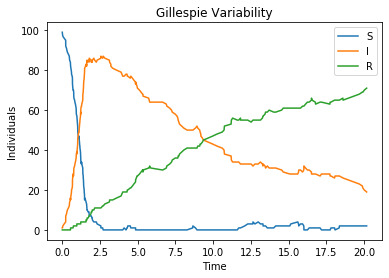

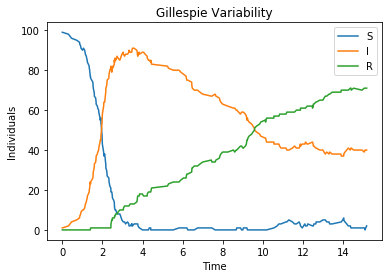

In [111]:
time, populations = Gillespie([99, 1, 0], 3, 0.1, 1/80, 250)

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie Variability')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()

time, populations = Gillespie([99, 1, 0], 3, 0.1, 1/80, 250)

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie Variability')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()


### Negative Co-variances

In [61]:
time, populations = Gillespie([99, 1, 0], 3, 0.1, 1/80, 250)
covariances = np.cov(populations[:,:2].T)
print(covariances)


[[1011.88833735 -480.2366747 ]
 [-480.2366747   600.32547791]]


### Increased transients

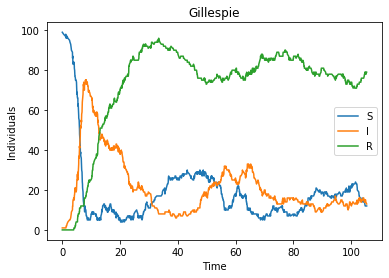

In [154]:
time, populations = Gillespie([99, 1, 0], 1, 0.1, 1/50, 1000)

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()


### Stochastic resonance

/Users/jurrew27/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


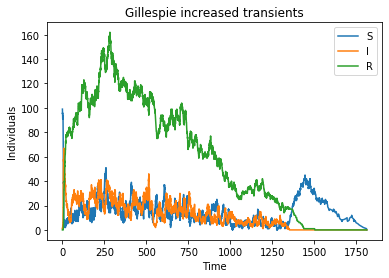

In [188]:
time, populations = Gillespie([99, 1, 0], 1, 0.1, 1/50, 100000)

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie increased transients')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()


### Extinctions

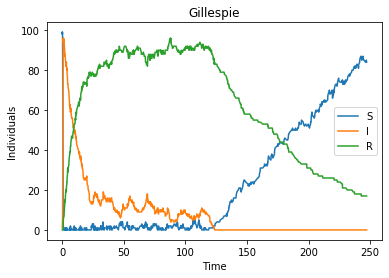

In [99]:
time, populations = Gillespie([99, 1, 0], 10, 0.1, 1/80, 1000)

plt.figure()
plt.plot(time, populations)
plt.title(f'Gillespie extinction')
plt.legend(['S', 'I', 'R'])
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.show()